In [1]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar

In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

/tmp/ipykernel_7284/603621990.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(pyramids)
/tmp/ipykernel_7284/603621990.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


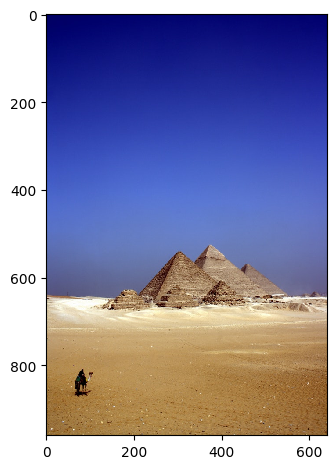

In [3]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



In [4]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

Original 'coffee' image:


/tmp/ipykernel_7284/40894117.py:13: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(coffee_image)
/tmp/ipykernel_7284/40894117.py:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


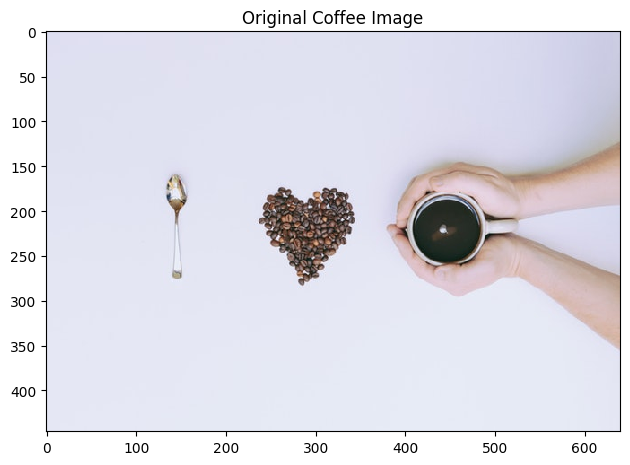


Original image dimensions (Height, Width, Channels): (446, 640, 3)
Top half of the 'coffee' image:


/tmp/ipykernel_7284/40894117.py:32: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(half_coffee_image)
/tmp/ipykernel_7284/40894117.py:34: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


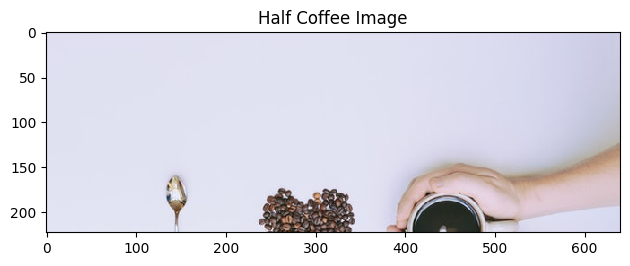

Half image dimensions (Height, Width, Channels): (223, 640, 3)


In [5]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''
image_path = 'coffee.jpeg' 

coffee_image = io.imread(image_path)

print("Original 'coffee' image:")
io.imshow(coffee_image)
plt.title('Original Coffee Image')
io.show()


# Get the dimensions (height, width, channels) of the image using the .shape attribute
image_shape = coffee_image.shape
height = image_shape[0]
print(f"\nOriginal image dimensions (Height, Width, Channels): {image_shape}")


# Create a new variable containing the top half of the image
# We slice the NumPy array along its first axis (height) from the beginning to the midpoint.
# The ':' for the second and third dimensions means we keep all columns (width) and all color channels.
half_coffee_image = coffee_image[0:height // 2, :, :]


# Show and "print" (display) the half image
print("Top half of the 'coffee' image:")
io.imshow(half_coffee_image)
plt.title('Half Coffee Image')
io.show()

print(f"Half image dimensions (Height, Width, Channels): {half_coffee_image.shape}")



--- Part 1: Testing gray_image function with 'pyramids' image ---


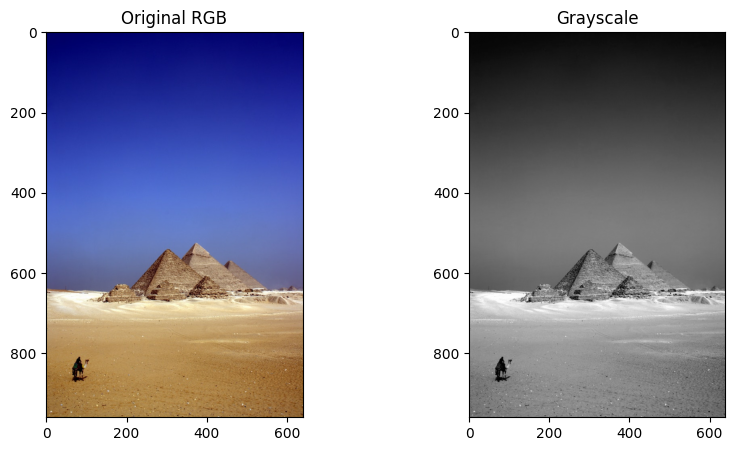


--- Part 2: Testing HSV_image function with 'astronaut' image ---


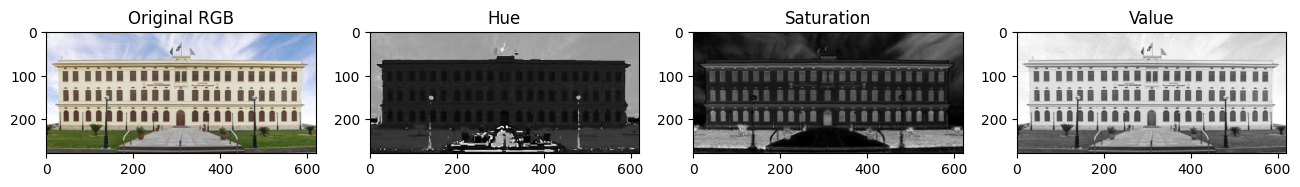

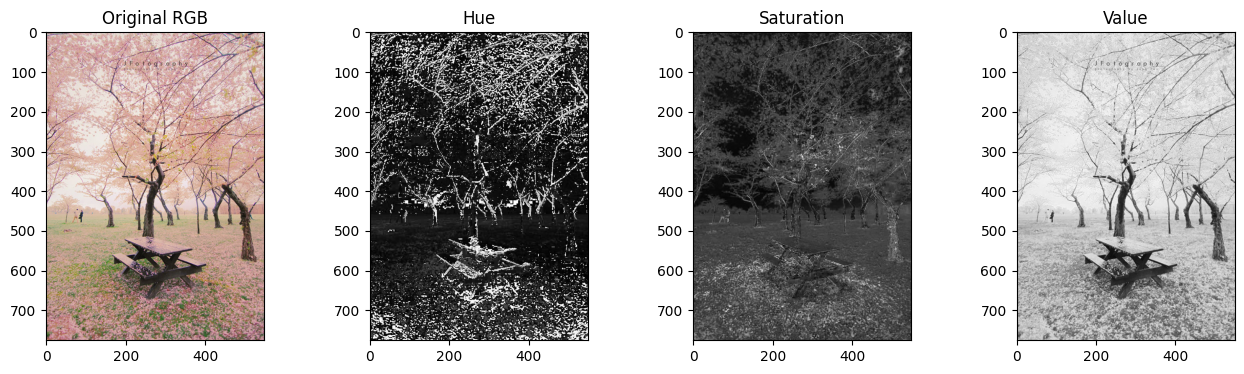

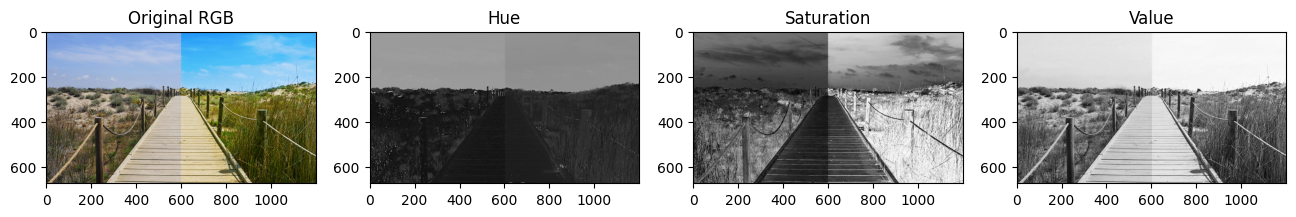


--- Comment on HSV Results ---

1.  Hue Channel: Shows the pure color. Different colors become different shades of gray. This channel ignores brightness or whiteness.

2.  Saturation Channel: Shows the intensity of the color. Bright white areas mean the color is very pure and vivid. Dark areas mean the color is dull (closer to gray). The white and black parts of the astronaut's suit are very dark in this channel.

3.  Value Channel: Shows the brightness of the image. This channel looks almost exactly like the grayscale version of the image because it only contains the light/dark information, with no color.



In [6]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
'''

def gray_image(rgb_img):
    """
    Converts an RGB image to grayscale and displays both side-by-side.
    """
    gray_img = rgb2gray(rgb_img)
    
    # Create a figure to display the images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_img)
    plt.title("Original RGB")
    
    plt.subplot(1, 2, 2)
    plt.imshow(gray_img, cmap='gray')
    plt.title("Grayscale")
    
    plt.show()

print("--- Part 1: Testing gray_image function with 'pyramids' image ---")
pyramids_image = io.imread('pyramids.jpeg')
gray_image(pyramids_image)


'''
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''

def HSV_image(rgb_img):
    """
    Converts RGB to HSV and displays the original image and its H, S, V channels.
    """
    hsv_img = rgb2hsv(rgb_img)
    
    hue_channel = hsv_img[:, :, 0]
    saturation_channel = hsv_img[:, :, 1]
    value_channel = hsv_img[:, :, 2]
    
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 4, 1)
    plt.imshow(rgb_img)
    plt.title("Original RGB")
    
    plt.subplot(1, 4, 2)
    plt.imshow(hue_channel, cmap='gray')
    plt.title("Hue")
    
    plt.subplot(1, 4, 3)
    plt.imshow(saturation_channel, cmap='gray')
    plt.title("Saturation")
    
    plt.subplot(1, 4, 4)
    plt.imshow(value_channel, cmap='gray')
    plt.title("Value")
    
    plt.show()


print("\n--- Part 2: Testing HSV_image function with 'astronaut' image ---")
img1 = io.imread('hsv/ex1.png')
HSV_image(img1)

img2 = io.imread('hsv/ex2.jpg')
HSV_image(img2)

img3 = io.imread('hsv/ex3.jpg')
HSV_image(img3)

print("""
--- Comment on HSV Results ---

1.  Hue Channel: Shows the pure color. Different colors become different shades of gray. This channel ignores brightness or whiteness.

2.  Saturation Channel: Shows the intensity of the color. Bright white areas mean the color is very pure and vivid. Dark areas mean the color is dull (closer to gray). The white and black parts of the astronaut's suit are very dark in this channel.

3.  Value Channel: Shows the brightness of the image. This channel looks almost exactly like the grayscale version of the image because it only contains the light/dark information, with no color.
""")

--- Applying Salt & Pepper Noise ---


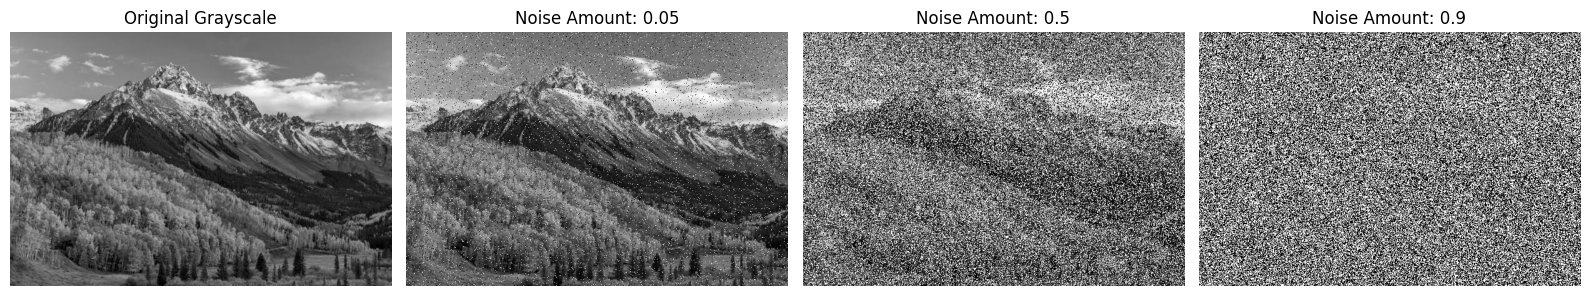


--- Recommendation for an Image Less Affected by Noise ---
An image that would be less "greatly affected" by salt & pepper noise is one with large areas of flat, uniform color and simple shapes.

--- Applying Salt & Pepper Noise for flat image ---


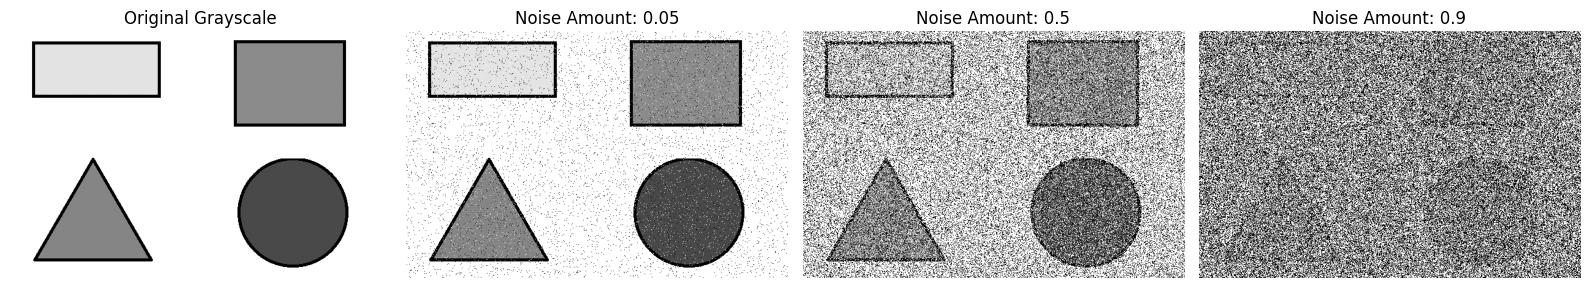

In [10]:
'''
Requirement 2 (Noise):
1. For an image of your choice (the effect of noise must be obvious): 
    - Read the image.
    - Convert it to greyscale.
    - Apply salt & pepper noise with amount=0.05, 0.5 and 0.9
'''

print("--- Applying Salt & Pepper Noise ---")

# Read the built-in 'coffee' image
# gray_and_salt_original = io.imread('coffee.jpeg')
gray_and_salt_original = io.imread('mountain.jpg')

# Convert the image to grayscale
gray_coffee = rgb2gray(gray_and_salt_original)

# Apply salt & pepper noise with three different amounts
noisy_coffee_05 = random_noise(gray_coffee, mode='s&p', amount=0.05)
noisy_coffee_50 = random_noise(gray_coffee, mode='s&p', amount=0.5)
noisy_coffee_90 = random_noise(gray_coffee, mode='s&p', amount=0.9)

# --- Display the results side-by-side ---
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(gray_coffee, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off') # Hide axes for clarity

plt.subplot(1, 4, 2)
plt.imshow(noisy_coffee_05, cmap='gray')
plt.title("Noise Amount: 0.05")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(noisy_coffee_50, cmap='gray')
plt.title("Noise Amount: 0.5")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(noisy_coffee_90, cmap='gray')
plt.title("Noise Amount: 0.9")
plt.axis('off')

plt.tight_layout()
plt.show()


'''
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.
'''

print("""
--- Recommendation for an Image Less Affected by Noise ---
An image that would be less "greatly affected" by salt & pepper noise is one with large areas of flat, uniform color and simple shapes.
""")
print("--- Applying Salt & Pepper Noise for flat image ---")

# Read the built-in 'coffee' image
# gray_and_salt_original = io.imread('coffee.jpeg')
gray_and_salt_original = io.imread('Area.png')

# Convert the image to grayscale
gray_coffee = rgb2gray(gray_and_salt_original)

# Apply salt & pepper noise with three different amounts
noisy_coffee_05 = random_noise(gray_coffee, mode='s&p', amount=0.05)
noisy_coffee_50 = random_noise(gray_coffee, mode='s&p', amount=0.5)
noisy_coffee_90 = random_noise(gray_coffee, mode='s&p', amount=0.9)

# --- Display the results side-by-side ---
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(gray_coffee, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off') # Hide axes for clarity

plt.subplot(1, 4, 2)
plt.imshow(noisy_coffee_05, cmap='gray')
plt.title("Noise Amount: 0.05")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(noisy_coffee_50, cmap='gray')
plt.title("Noise Amount: 0.5")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(noisy_coffee_90, cmap='gray')
plt.title("Noise Amount: 0.9")
plt.axis('off')

plt.tight_layout()
plt.show()


--- Part 1: Analyzing Image Histograms ---

--- Processing Image: histogram/ex1.jpg ---


/tmp/ipykernel_7284/3438790915.py:67: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image_gray, cmap='gray')
/tmp/ipykernel_7284/3438790915.py:69: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


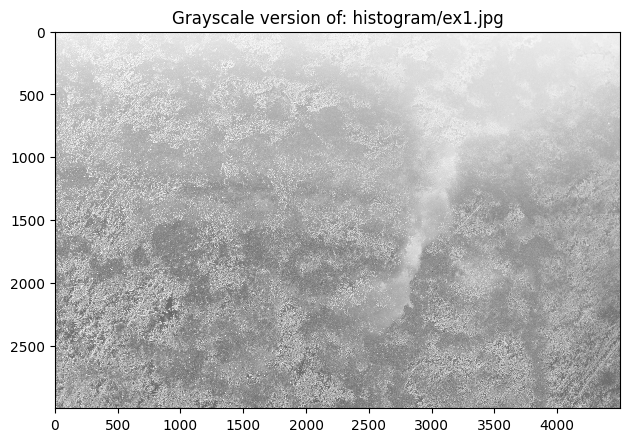

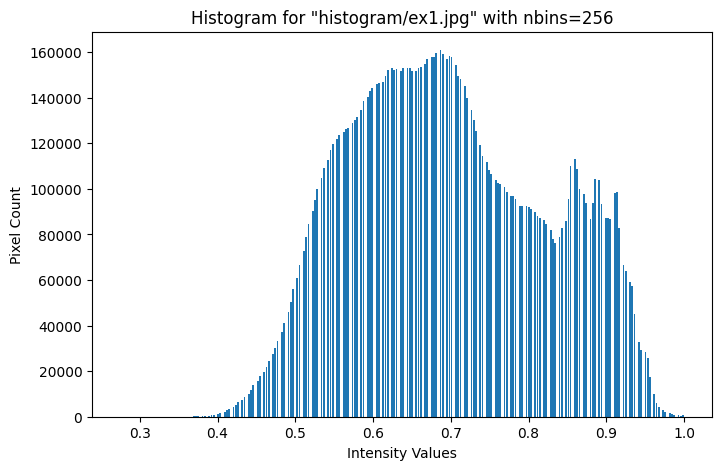

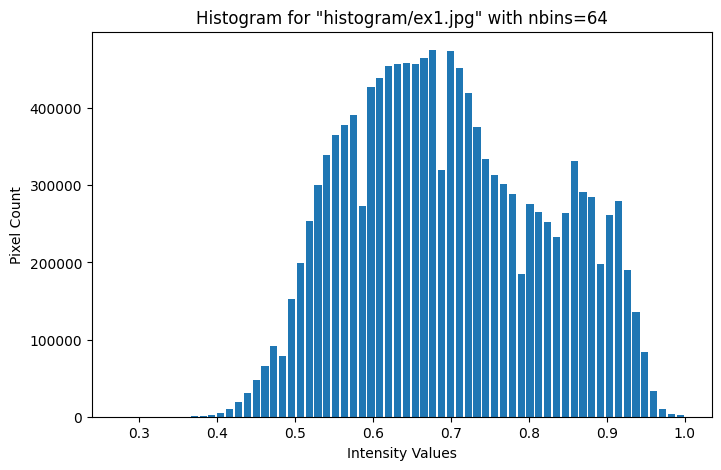

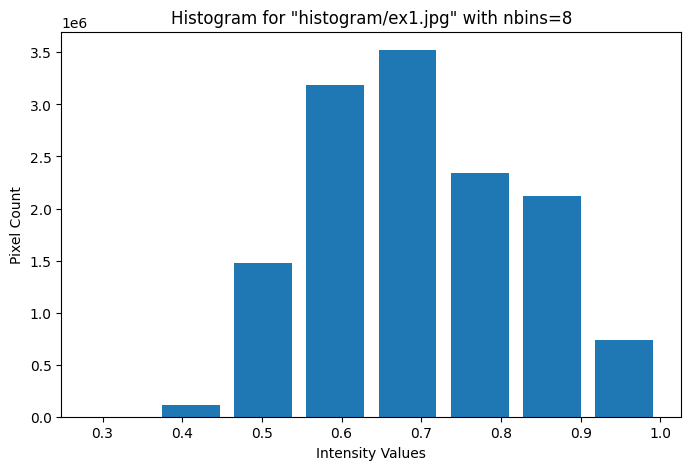


--- Processing Image: histogram/ex2.png ---
Detected RGBA image, converting to RGB...


/tmp/ipykernel_7284/3438790915.py:67: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image_gray, cmap='gray')
/tmp/ipykernel_7284/3438790915.py:69: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


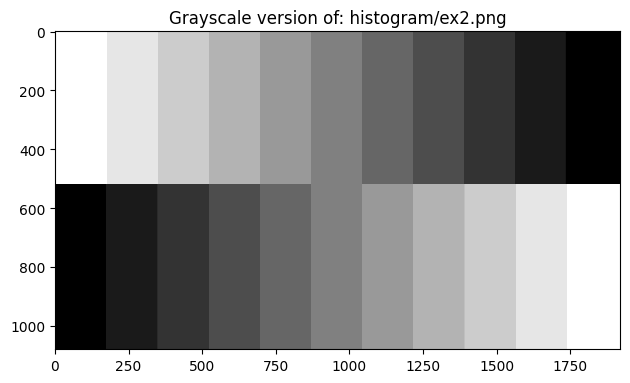

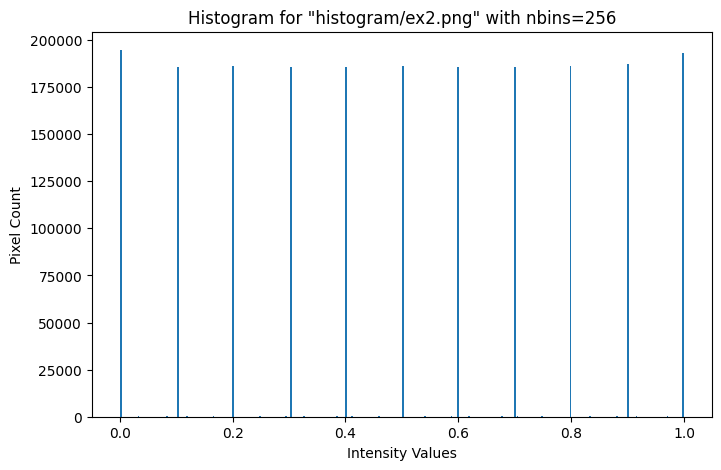

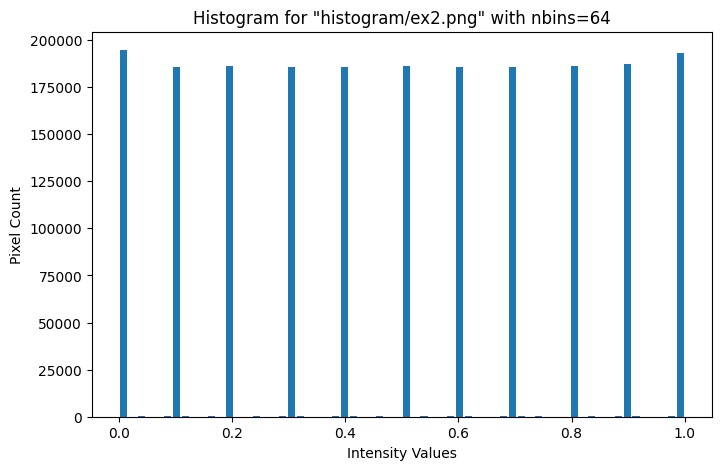

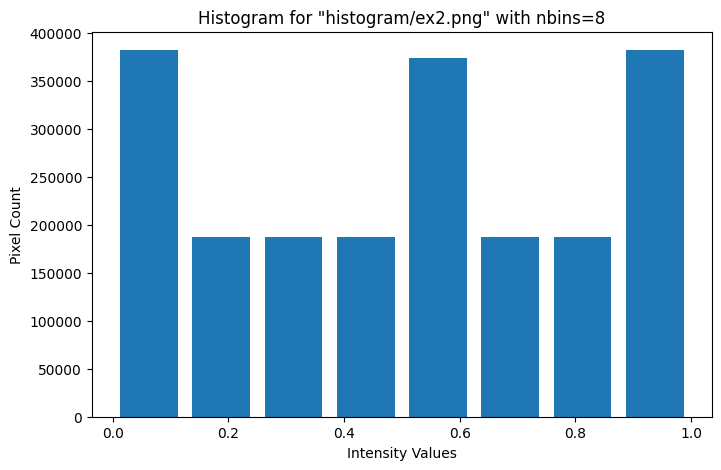


--- Processing Image: histogram/ex3.png ---


/tmp/ipykernel_7284/3438790915.py:67: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image_gray, cmap='gray')
/tmp/ipykernel_7284/3438790915.py:69: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


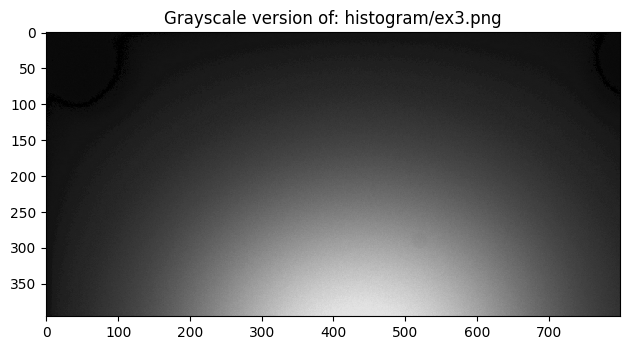

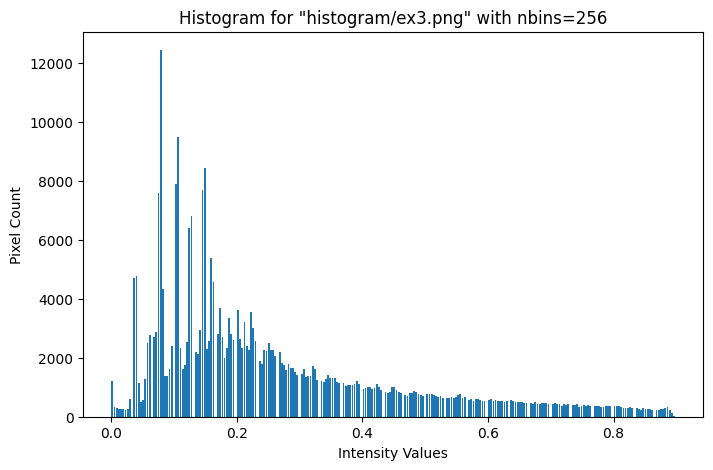

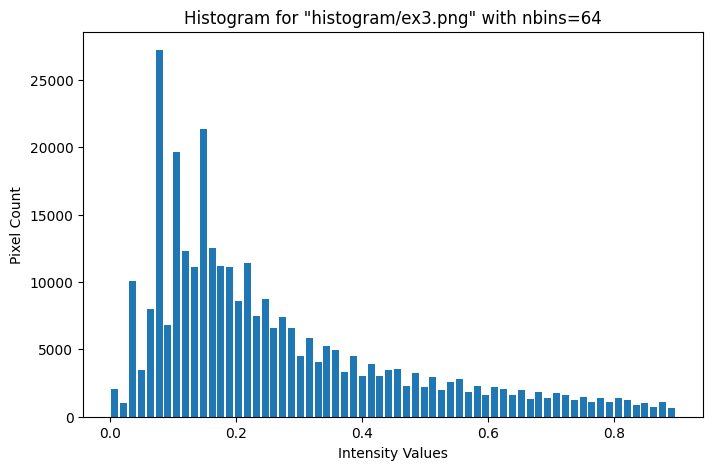

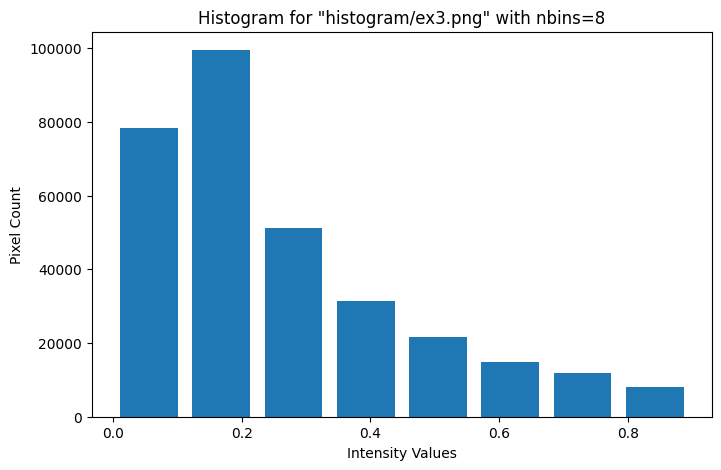


--- Explanation of nbins ---
'nbins' stands for the "number of bins". It controls the granularity of the histogram.
- nbins=256: One bin for each possible intensity value (0-255). Most detailed view.
- nbins=64: Groups intensities into 64 ranges. More generalized view.
- nbins=8: Groups intensities into 8 wide ranges. Very high-level overview.


--- Part 2: Creating an Image with a Uniform Histogram ---
Generated 256x256 Image with a Uniform Histogram:


/tmp/ipykernel_7284/3438790915.py:96: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(uniform_image, cmap='gray')
/tmp/ipykernel_7284/3438790915.py:98: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


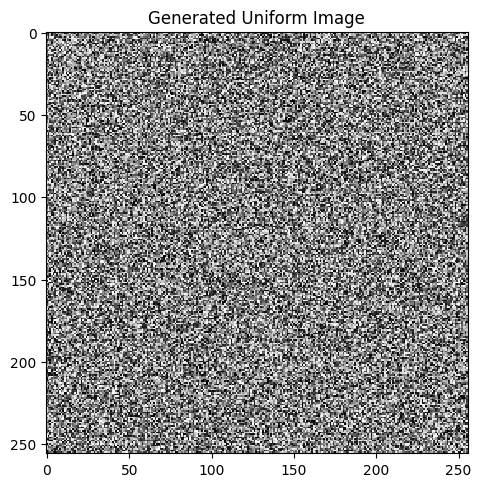

Histogram of the Generated Image (should be uniform):


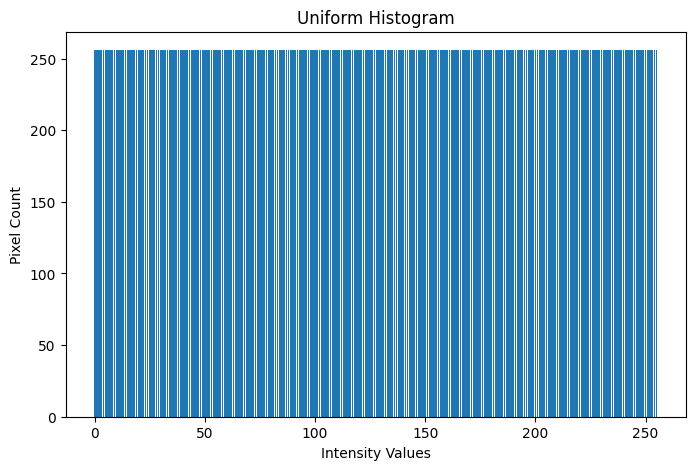

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.exposure import histogram
import os

'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
'''

def showHist(hist, bins, title='Histogram'):
    """
    A function to draw a histogram given the histogram values and bin centers.
    """
    plt.figure(figsize=(8, 5))
    bar_width = bins[1] - bins[0] if len(bins) > 1 else 1
    plt.bar(bins, hist, width=bar_width * 0.8, align='center')
    plt.title(title)
    plt.xlabel('Intensity Values')
    plt.ylabel('Pixel Count')
    plt.show()

# --- Part 1: Analyzing Histograms from Specific Files ---
print("--- Part 1: Analyzing Image Histograms ---")

image_paths = [
    'histogram/ex1.jpg',
    'histogram/ex2.png',
    'histogram/ex3.png' # Corrected typo from historgram to histogram
]

for path in image_paths:
    if not os.path.exists(path):
        print(f"\n--- SKIPPING: File not found at '{path}' ---")
        continue

    print(f"\n--- Processing Image: {path} ---")
    
    image = io.imread(path)
    
    # --- START OF FIX ---
    # The histogram function works on grayscale images. We need to handle
    # RGB (3-channel), RGBA (4-channel), and Grayscale (2D) images.
    if image.ndim == 3:
        # This is a color image
        if image.shape[2] == 4:
            # This is an RGBA image with 4 channels.
            # Convert it to RGB (3 channels) first, which handles transparency.
            print("Detected RGBA image, converting to RGB...")
            image_rgb = color.rgba2rgb(image)
            image_gray = color.rgb2gray(image_rgb)
        else:
            # This is a standard RGB image with 3 channels.
            image_gray = color.rgb2gray(image)
    else:
        # This is already a 2D grayscale image.
        image_gray = image
    # --- END OF FIX ---

    io.imshow(image_gray, cmap='gray')
    plt.title(f"Grayscale version of: {path}")
    io.show()
    
    nbins_list = [256, 64, 8]
    for nbins_value in nbins_list:
        hist_values, bin_centers = histogram(image_gray, nbins=nbins_value)
        showHist(hist_values, bin_centers, title=f'Histogram for "{path}" with nbins={nbins_value}')

print("""
--- Explanation of nbins ---
'nbins' stands for the "number of bins". It controls the granularity of the histogram.
- nbins=256: One bin for each possible intensity value (0-255). Most detailed view.
- nbins=64: Groups intensities into 64 ranges. More generalized view.
- nbins=8: Groups intensities into 8 wide ranges. Very high-level overview.
""")

'''
** 2- Draw a grey-scale image that has uniform histogram 
(same number of pixels for all intensity levels) using code only. 
Let the size of the image be 256x256.
'''
print("\n--- Part 2: Creating an Image with a Uniform Histogram ---")

pixels = np.arange(256, dtype=np.uint8).repeat(256)
np.random.shuffle(pixels)
uniform_image = pixels.reshape((256, 256))

print("Generated 256x256 Image with a Uniform Histogram:")
io.imshow(uniform_image, cmap='gray')
plt.title("Generated Uniform Image")
io.show()

print("Histogram of the Generated Image (should be uniform):")
uniform_hist, uniform_bins = histogram(uniform_image, nbins=256)
showHist(uniform_hist, uniform_bins, title="Uniform Histogram")